# Predicting bike rentals in Washington D.C.

In this project we build several machine learning model to predict the number of bikes rented per day in Washington D.C. Our goal is to compare the performance of Linear Regression, Trees and Random Forests.

The data was compiled by Hadi Fanaee-T at the University of Porto and can be downloaded [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

We begin by loading the data and exploring the distribution and correlations of the target column _cnt_ which represents the total number of bike rentals each day. In particular, each row in the dataset represents one day. Note that for each row, the value of the _cnt_ column is given by the sum of the _casual_ column and the _registered_ column, so we will leave these two out of our features.

Our error metric of choice is the Mean Absolute Error (MEA) because it is easier to interpret in this context.

In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


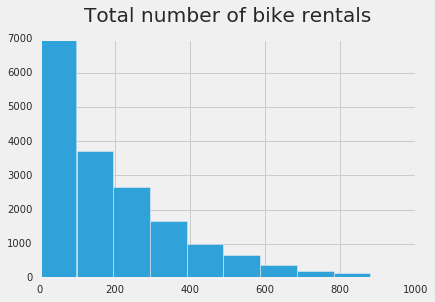

In [3]:
plt.style.use('fivethirtyeight')

bike_rentals['cnt'].hist()
plt.title('Total number of bike rentals', y=1.05)
plt.show()

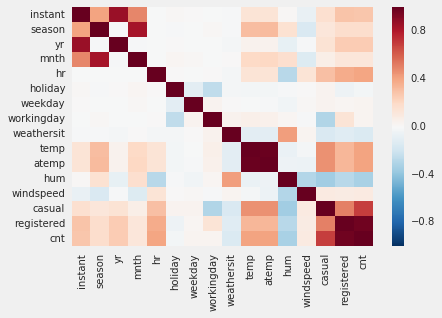

In [4]:
correlations = bike_rentals.corr()
sns.heatmap(correlations)
plt.show()

## Feature engineering

We bundle hours together according to the following dictionary:

1: (morning) from 6am to 12am

2: (afternoon) from 12am to 6pm

3: (evening) from 6pm to 12pm

4: (night) from 12pm to 6am

In [5]:
def assign_label(hour):
    # Morning
    if 6 <= hour < 12:
        return 1
    
    # Afternoon
    elif 12 <= hour < 18:
        return 2
    
    # Evening
    elif 18 <= hour < 24:
        return 3
    
    # Night
    elif 0 <= hour < 6:
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

## Linear Regression

Next we manually create train and test datasets. Next, we will use a linear regression using all columns except for _cnt_, _casual_, _dteday_ and _registered_ as features.

In [6]:
train_percent = .8
nr_rows = bike_rentals.shape[0]
train = bike_rentals.sample(int(nr_rows * train_percent), axis=0)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [7]:
columns = bike_rentals.columns.values
features = [x for x in columns if x not in ['cnt', 'casual', 'dteday', 'registered']]

In [34]:
def train_and_test_lr(features):
    lr = LinearRegression()
    lr.fit(train[features], train['cnt'])

    predictions_lr = lr.predict(test[features])
    error = mean_absolute_error(predictions_lr, test['cnt'])
    print('Number of features: {0}\nMean Absolute Error: {1}\nMean target: {2}'.format(len(features), round(error,4), round(np.mean(test['cnt']),4)))
    
train_and_test_lr(features)
print('-' * 10)
train_and_test_lr(['hr', 'atemp', 'hum'])

Number of features: 14
Mean Absolute Error: 99.293
Mean target: 189.4974
----------
Number of features: 3
Mean Absolute Error: 109.6901
Mean target: 189.4974


### Conclusions

The MAE is very large compared to a typical entry in the target column. 

## Decision Trees

For our next approach, we will train a decision tree and compare the error with the above.

In [51]:
def train_and_test_dtr(features, min_samples_leaf=1, max_depth=None):
    dtr = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, max_depth=max_depth)

    dtr.fit(train[features], train['cnt'])
    predictions_dtr = dtr.predict(test[features])

    error = mean_absolute_error(predictions_dtr, test['cnt'])
    print('''Minimum number of samples in a leaf: {0}\nMax depth: {1}\nMean Absolute Error: {2}\n'''.format(min_samples_leaf, max_depth, round(error,4)))

print('Mean target: {0}'.format(round(np.mean(test['cnt']),4)))
print('-' * 10)
for k in range(1,7):
    train_and_test_dtr(features, k)

Mean target: 189.4974
----------
Minimum number of samples in a leaf: 1
Max depth: None
Mean Absolute Error: 33.8403

Minimum number of samples in a leaf: 2
Max depth: None
Mean Absolute Error: 32.4361

Minimum number of samples in a leaf: 3
Max depth: None
Mean Absolute Error: 31.3772

Minimum number of samples in a leaf: 4
Max depth: None
Mean Absolute Error: 30.504

Minimum number of samples in a leaf: 5
Max depth: None
Mean Absolute Error: 30.3485

Minimum number of samples in a leaf: 6
Max depth: None
Mean Absolute Error: 31.1586



In [60]:
for k in range(10,25):
    train_and_test_dtr(features, min_samples_leaf=5, max_depth=k)

Minimum number of samples in a leaf: 5
Max depth: 10
Mean Absolute Error: 36.8643

Minimum number of samples in a leaf: 5
Max depth: 11
Mean Absolute Error: 34.36

Minimum number of samples in a leaf: 5
Max depth: 12
Mean Absolute Error: 32.3171

Minimum number of samples in a leaf: 5
Max depth: 13
Mean Absolute Error: 31.3691

Minimum number of samples in a leaf: 5
Max depth: 14
Mean Absolute Error: 30.9534

Minimum number of samples in a leaf: 5
Max depth: 15
Mean Absolute Error: 30.8378

Minimum number of samples in a leaf: 5
Max depth: 16
Mean Absolute Error: 30.5256

Minimum number of samples in a leaf: 5
Max depth: 17
Mean Absolute Error: 30.3125

Minimum number of samples in a leaf: 5
Max depth: 18
Mean Absolute Error: 30.3065

Minimum number of samples in a leaf: 5
Max depth: 19
Mean Absolute Error: 30.3469

Minimum number of samples in a leaf: 5
Max depth: 20
Mean Absolute Error: 30.3468

Minimum number of samples in a leaf: 5
Max depth: 21
Mean Absolute Error: 30.3207

Minimu

## Random Forests

In [68]:
def train_and_test_rfr(features, min_samples_leaf=1, max_depth=None):
    rfr = RandomForestRegressor(min_samples_leaf=min_samples_leaf, max_depth=max_depth)

    rfr.fit(train[features], train['cnt'])
    predictions_rfr = rfr.predict(test[features])

    error = mean_absolute_error(predictions_rfr, test['cnt'])
    print('''Minimum number of samples in a leaf: {0}\nMax depth: {1}\nMean Absolute Error: {2}\n'''.format(min_samples_leaf, max_depth, round(error,4)))

print('Mean target: {0}'.format(round(np.mean(test['cnt']),4)))
print('-' * 10)
for k in range(1,7):
    train_and_test_rfr(features, k)

Mean target: 189.4974
----------
Minimum number of samples in a leaf: 1
Max depth: None
Mean Absolute Error: 26.3062

Minimum number of samples in a leaf: 2
Max depth: None
Mean Absolute Error: 25.7677

Minimum number of samples in a leaf: 3
Max depth: None
Mean Absolute Error: 26.2132

Minimum number of samples in a leaf: 4
Max depth: None
Mean Absolute Error: 26.419

Minimum number of samples in a leaf: 5
Max depth: None
Mean Absolute Error: 26.8307

Minimum number of samples in a leaf: 6
Max depth: None
Mean Absolute Error: 27.48



## Conclusions

The Random Forests perform the best, and optimizing the maximum number of samples in a leaf